In [238]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [239]:
est_sal = [30000, 30000, 35000, 40000, 40000, 42000, 45000, 45000, 50000, 50000, 50000, 55000, 55000, 60000, 65000, 65000, 65000, 65000, 70000, 70000, 75000, 77000, 80000, 80000, 80000, 80000, 85000, 85000, 85000, 90000]

In [240]:
def sf_analysis(est_sal, upfront):
    start_debt = 11538.8 - upfront
    master_list = []
    for x in est_sal:
        month_val = x/12
        temp_list = [month_val]*12
        master_list = master_list + temp_list
    df = pd.DataFrame(columns = ['Salary', 'Balance', 'Interest', 'Payment', 'Net'])
    bal = start_debt
    net = 0
    for i, sal in zip(np.arange(1,361), master_list):
        bal = bal+ net
        if bal <= 0:
            month_stop = i
            break
        intrst = (bal/12) * 0.056
        p_taken = ((sal - 1750)*0.09)
        net = intrst - p_taken
        df.loc[i] = [sal, bal, intrst, p_taken, net]
    x = upfront + df['Payment'].sum()
    print(f'Total amount paid back for {upfront} upfront payment is {x} which makes the interest {x-11538.8}')
    return df, x, month_stop

In [241]:
df = pd.DataFrame(columns = ['Salary', 'Balance', 'Interest', 'Payment', 'Net'])
bal = start_debt
net = 0
for i, sal in zip(np.arange(1,361), est_sal):
    bal = bal+ net
    if bal <= 0:
        break
    intrst = bal * 0.056
    p_taken = ((sal - 21000)*0.09)
    net = intrst - p_taken
    df.loc[i] = [sal, bal, intrst, p_taken, net]

In [242]:
df_results = pd.DataFrame(columns=['Upfront Payment', 'Total Paid', 'Month Stop'])
input = np.arange(0, 12000, 500)
for i, x in zip (np.arange(len(input)), input):
    df, y, month = sf_analysis(est_sal, upfront=x)
    df_results.loc[i] = [x,y, month]

Total amount paid back for 0 upfront payment is 15772.5 which makes the interest 4233.700000000001
Total amount paid back for 500 upfront payment is 15402.5 which makes the interest 3863.7000000000007
Total amount paid back for 1000 upfront payment is 15032.5 which makes the interest 3493.7000000000007
Total amount paid back for 1500 upfront payment is 14662.5 which makes the interest 3123.7000000000007
Total amount paid back for 2000 upfront payment is 14330.0 which makes the interest 2791.2000000000007
Total amount paid back for 2500 upfront payment is 14110.0 which makes the interest 2571.2000000000007
Total amount paid back for 3000 upfront payment is 13890.0 which makes the interest 2351.2000000000007
Total amount paid back for 3500 upfront payment is 13670.0 which makes the interest 2131.2000000000007
Total amount paid back for 4000 upfront payment is 13450.0 which makes the interest 1911.2000000000007
Total amount paid back for 4500 upfront payment is 13230.0 which makes the int

In [243]:
df_results['Interest Paid'] = df_results['Total Paid'] - 11538.8
baseline = df_results.iloc[0]['Interest Paid']
df_results['Interest Saved'] = baseline - df_results['Interest Paid']
df_results['Proportional Benefit'] = (df_results['Interest Saved']/df_results['Upfront Payment'])
df_results.fillna(0, inplace=True)
df_results

,Upfront Payment,Total Paid,Month Stop,Interest Paid,Interest Saved,Proportional Benefit
0,0.0,15772.5,112.0,4233.7,0.0,0.000000
1,500.0,15402.5,108.0,3863.7,370.0,0.740000
2,1000.0,15032.5,104.0,3493.7,740.0,0.740000
3,1500.0,14662.5,100.0,3123.7,1110.0,0.740000
4,2000.0,14330.0,96.0,2791.2,1442.5,0.721250
5,2500.0,14110.0,92.0,2571.2,1662.5,0.665000
6,3000.0,13890.0,88.0,2351.2,1882.5,0.627500
7,3500.0,13670.0,84.0,2131.2,2102.5,0.600714
8,4000.0,13450.0,80.0,1911.2,2322.5,0.580625
9,4500.0,13230.0,76.0,1691.2,2542.5,0.565000


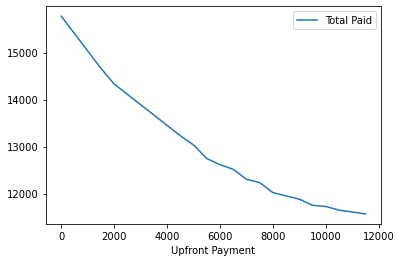

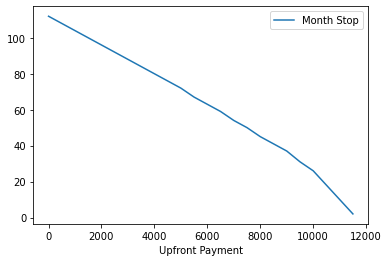

In [244]:
df_results.plot(x='Upfront Payment', y='Total Paid')
df_results.plot(x='Upfront Payment', y='Month Stop')